In [5]:
import os
output_path = "/Users/Jayee/Library/CloudStorage/OneDrive-UW-Madison/PhD(my_PC)/\
PhD(output_files)/Engineering_projects/\
Indentation_tests/240908_2_regime_analysis_2d_GPR_all_data/240909_GPR_lmr_hmr/both"

## Objective:

Having 2 data_dictionaries i.e lmr_dict, and hmr_dict we need to plot the GPR prediction simultaneously.

In [1]:
import os
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import WhiteKernel, RBF

# loading the pickle files
## loading hmr_dict
with open("hmr_dict.pkl","rb") as f:
    hmr_dict = pickle.load(f)
## loading hmr_dict
with open("lmr_dict.pkl","rb") as f:
    lmr_dict = pickle.load(f)
    
    

In [6]:
def plot_both(data_dict_1,data_dict_2):
    # Visualising the GPR surface
    x_grid_points = np.linspace(0,1,100)
    o_grid_points = np.linspace(0,1,100)
    x_mesh,o_mesh = np.meshgrid(x_grid_points,o_grid_points)
    xo_grid =np.hstack([x_mesh.reshape(-1,1), o_mesh.reshape(-1,1)])

    for _ in range(3):
        for index,__ in enumerate(["K_model","Y_model"]):

            # Dict 1
            mean_1,std_1 = data_dict_1[__][_].predict(xo_grid,return_std=True)
            var_name_1 = data_dict_1["names"][index]
            ## unscaling the grid points
            if index ==0:mean_unscaled_1 = data_dict_1["K_scalers"][_].inverse_transform(mean_1.reshape(-1,1))
            if index ==1:mean_unscaled_1 = data_dict_1["Y_scalers"][_].inverse_transform(mean_1.reshape(-1,1))
            xo_grid_unscaled_1 = data_dict_1["xo_scalers"][_].inverse_transform(xo_grid)
            ## unscaling the data points
            if index ==0:
                z_data_unscaled_1 = data_dict_1["K_scalers"][_].inverse_transform(data_dict_1[var_name_1][_].reshape(-1,1))
            if index ==1:
                z_data_unscaled_1 = data_dict_1["Y_scalers"][_].inverse_transform(data_dict_1[var_name_1][_].reshape(-1,1))
            xo_data_unscaled_1 = data_dict_1["xo_scalers"][_].inverse_transform(np.transpose(np.vstack([data_dict_1["x"][_],
                                                                                         data_dict_1["o"][_]])))
            x_data_unscaled_1 = xo_data_unscaled_1[:,0]
            o_data_unscaled_1 = xo_data_unscaled_1[:,1]

            # Dict 2
            mean_2,std_2 = data_dict_2[__][_].predict(xo_grid,return_std=True)
            var_name_2 = data_dict_2["names"][index]
            ## unscaling the grid points
            if index ==0:mean_unscaled_2 = data_dict_2["K_scalers"][_].inverse_transform(mean_2.reshape(-1,1))
            if index ==1:mean_unscaled_2 = data_dict_2["Y_scalers"][_].inverse_transform(mean_2.reshape(-1,1))
            xo_grid_unscaled_2 = data_dict_2["xo_scalers"][_].inverse_transform(xo_grid)
            ## unscaling the data points
            if index ==0:
                z_data_unscaled_2 = data_dict_2["K_scalers"][_].inverse_transform(data_dict_2[var_name_2][_].reshape(-1,1))
            if index ==1:
                z_data_unscaled_2 = data_dict_2["Y_scalers"][_].inverse_transform(data_dict_2[var_name_2][_].reshape(-1,1))
            xo_data_unscaled_2 = data_dict_2["xo_scalers"][_].inverse_transform(np.transpose(np.vstack([data_dict_2["x"][_],
                                                                                         data_dict_2["o"][_]])))
            x_data_unscaled_2 = xo_data_unscaled_2[:,0]
            o_data_unscaled_2 = xo_data_unscaled_2[:,1]

            # Common for dict 1 and dict 2
            fig = plt.figure(figsize=[10,10])
            axs = fig.add_subplot(111,projection="3d")
            axs.set_xlabel("$\mathbf{x}$ - axis", fontweight="bold",fontsize=12)
            axs.set_ylabel("$\mathbf{\\theta}$ - axis", fontweight = "bold", fontsize=12)
            axs.set_zlabel(f"{data_dict_1['names'][index]} - axis", fontweight="bold", fontsize=12)
            axs.set_title(f"Visualizing the GPR surface for {data_dict_1['colors'][_]} {data_dict_1['names'][index]}",
                          fontweight="bold",
                          fontsize=14)

            # Data dict 1
            ## Plotting the data points
            scatter = axs.scatter(x_data_unscaled_1,
                                  o_data_unscaled_1,
                                  z_data_unscaled_1,
                                  c=data_dict_1[var_name_1][_],  
                                  marker = data_dict_1["shapes"][index], 
                                  edgecolor="k",linewidth=2,s=100, 
                                  cmap= f"{data_dict_1['colors'][_]}s",
                                  label= f"{data_dict_1['colors'][_]} data")
            ## Plotting the labels
            for i, x, o, Y in zip(data_dict_1["labels"][_],
                                  x_data_unscaled_1,
                                  o_data_unscaled_1,
                                  z_data_unscaled_1[:,0]):
                axs.text(x, o, Y, f'  {i}', color=f"{data_dict_1['colors'][_]}", fontsize=10, fontweight='bold')
            ## plotting the grid
            axs.scatter(xo_grid_unscaled_1[:,0], xo_grid_unscaled_1[:,1], 
                mean_unscaled_1, c=f"{data_dict_1['colors'][_]}", s = 0.1, label= "GPR-Surface")

            # Data dict 2
            ## Plotting the data points
            scatter = axs.scatter(x_data_unscaled_2,
                                  o_data_unscaled_2,
                                  z_data_unscaled_2,
                                  c=data_dict_2[var_name_2][_],  
                                  marker = data_dict_2["shapes"][index], 
                                  edgecolor="k",linewidth=2,s=100, 
                                  cmap= f"{data_dict_2['colors'][_]}s",
                                  label= f"{data_dict_2['colors'][_]} data")
            ## Plotting the labels
            for i, x, o, Y in zip(data_dict_2["labels"][_],
                                  x_data_unscaled_2,
                                  o_data_unscaled_2,
                                  z_data_unscaled_2[:,0]):
                axs.text(x, o, Y, f'  {i}', color=f"{data_dict_2['colors'][_]}", fontsize=10, fontweight='bold')

            ## plotting the grid
            axs.scatter(xo_grid_unscaled_2[:,0], xo_grid_unscaled_2[:,1], 
                mean_unscaled_2, c=f"{data_dict_2['colors'][_]}", s = 0.1, label= "GPR-Surface")

            legend = axs.legend(loc="best",facecolor="pink", edgecolor="black")
            cbar = fig.colorbar(scatter, ax=axs, shrink=0.5, aspect=15)
            cbar.set_label('Color Intensity', fontsize=12, fontweight='bold')


            axs.view_init(elev=20, azim=30)
            # Saving
            file_name = f"3_GPR_unscaled_{data_dict_1['names'][index]}_{data_dict_1['colors'][_]}.pdf"
            file_loc = os.path.join(output_path,file_name)
            plt.savefig(file_loc)


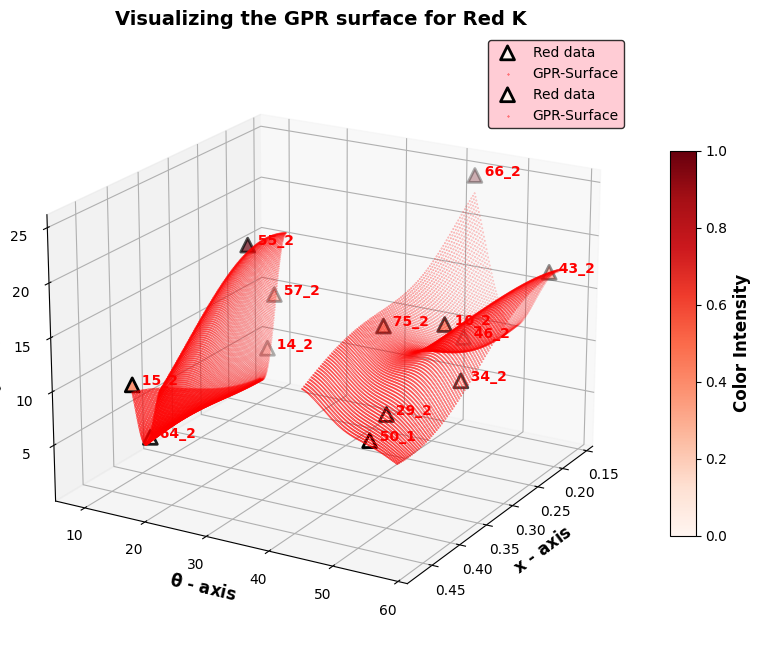

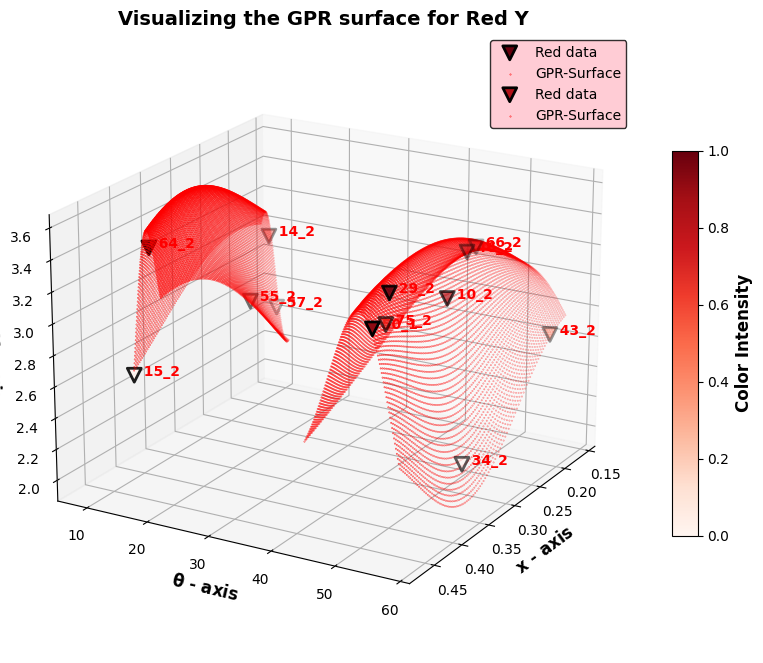

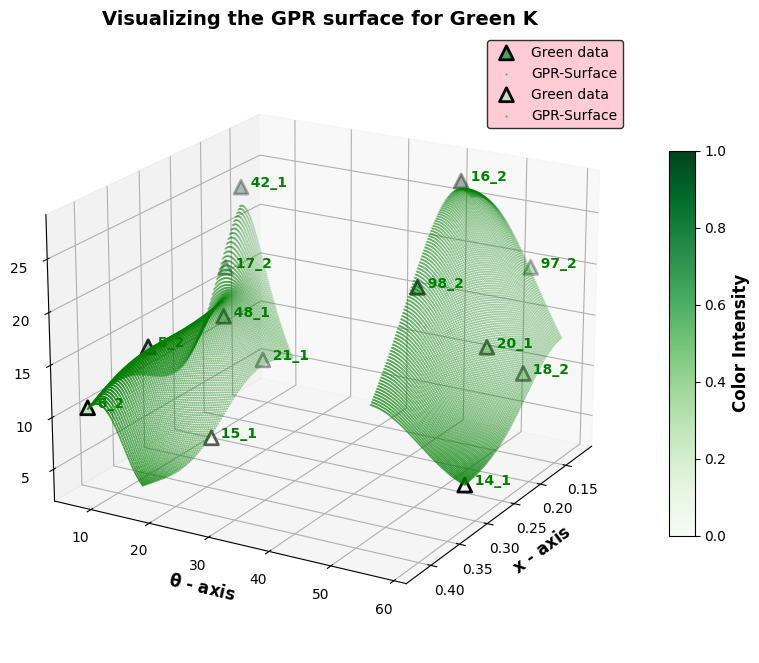

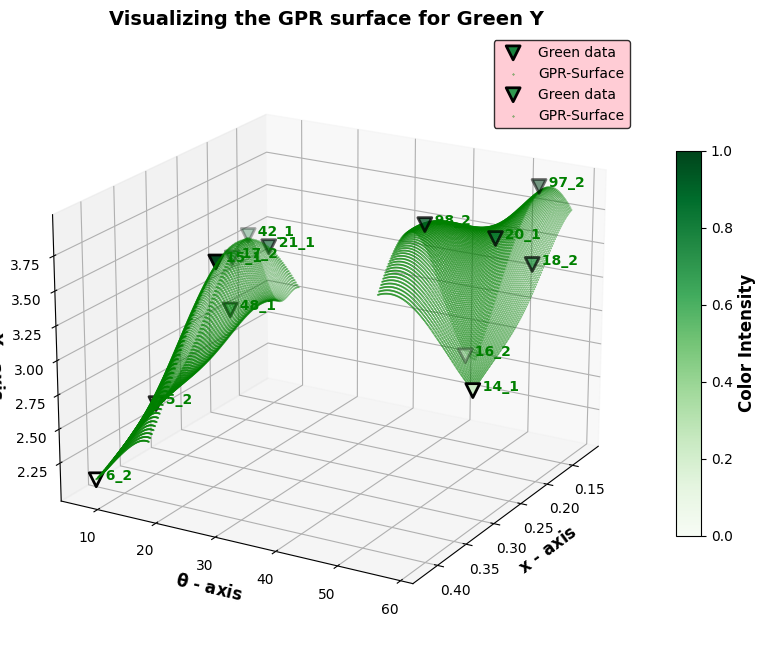

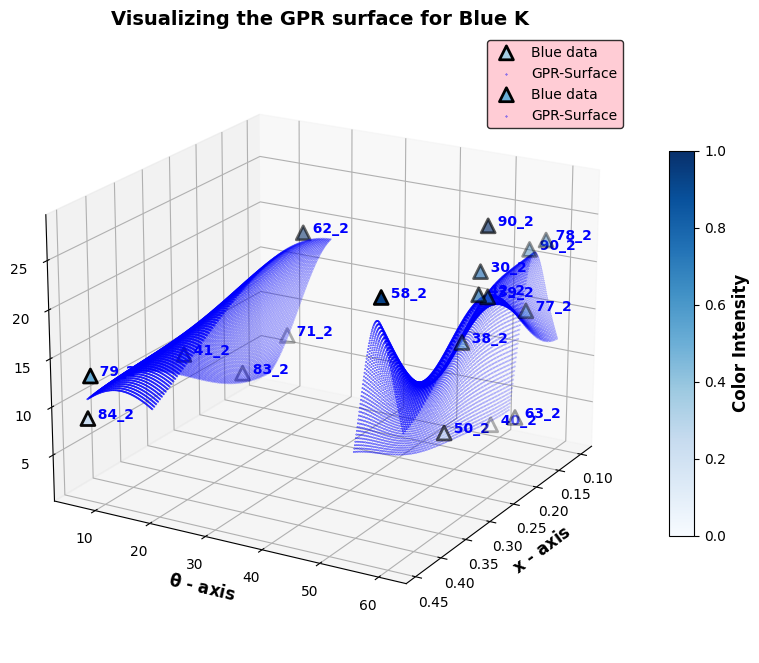

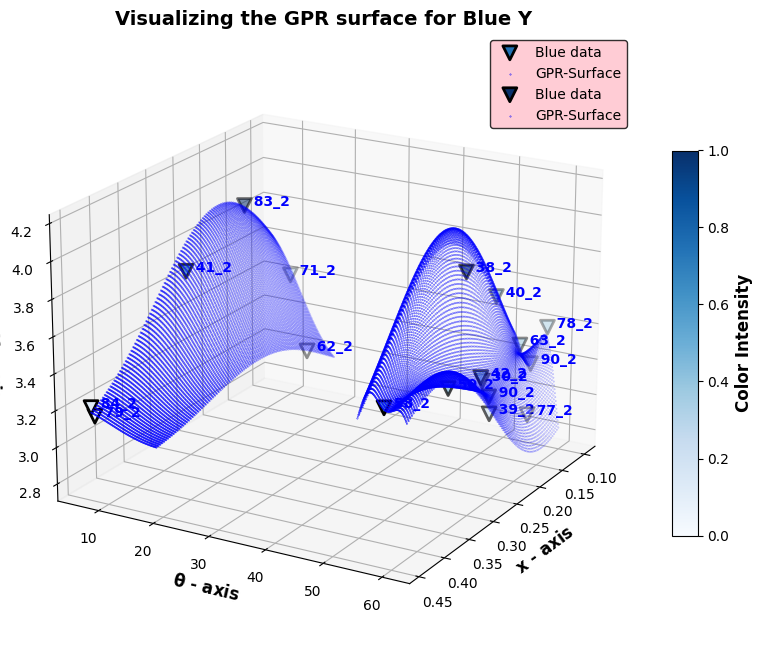

In [7]:
plot_both(lmr_dict,hmr_dict)